In [1]:
#Primer paso que se realizo fue importar todas las librerias que vamos a utilizar
import pandas as pd
import json
import re
from fastapi import FastAPI
from datetime import datetime

In [ ]:
#Primer arcivho csv importado
df1 = pd.read_csv(r"C:\Users\Admin\Desktop\SoyHenry\Proyectos\Individual 1\movies_dataset.csv")

In [3]:
#Segundo csv importado
df_credits = pd.read_csv(r"C:\Users\Admin\Desktop\SoyHenry\Proyectos\credits.csv")

Proceso de ETL

In [4]:
#Se crea la funcion para desanidar.
class desanidar:
    @staticmethod
    def convertir_a_str(valor):
        if isinstance(valor, (list, dict)):
            return json.dumps(valor)
        return str(valor)
    @staticmethod
    def extraer_nombres(valor):
        pattern = r"'name': '([^']*)'"
        coincidencias = re.findall(pattern, valor)
        if len(coincidencias) > 0:
            nombre = coincidencias[0]
            return nombre
        else:
            return None

In [5]:
#Segundo paso para desanidar (Son varios)
df1['belongs_to_collection'] = df1['belongs_to_collection'].apply(desanidar.convertir_a_str).apply(desanidar.extraer_nombres)

In [6]:
df1['genres'] = df1['genres'].apply(desanidar.convertir_a_str).apply(desanidar.extraer_nombres)

In [7]:
df1['production_companies'] = df1['production_companies'].apply(desanidar.convertir_a_str).apply(desanidar.extraer_nombres)

In [8]:
df1['production_countries'] = df1['production_countries'].apply(desanidar.convertir_a_str).apply(desanidar.extraer_nombres)

In [9]:
df1['spoken_languages'] = df1['spoken_languages'].apply(desanidar.convertir_a_str).apply(desanidar.extraer_nombres)

In [10]:
df_credits['cast'] = df_credits['cast'].apply(desanidar.convertir_a_str).apply(desanidar.extraer_nombres)

In [11]:
df_credits['crew'] = df_credits['crew'].apply(desanidar.convertir_a_str).apply(desanidar.extraer_nombres)

In [ ]:
#Se borran las columnas que no sirven a futuro
df1 = df1.dropna(subset=['release_date'])
columnas_a_eliminar = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage']
df1 = df1.drop(columns=columnas_a_eliminar)

In [13]:
# Convertir las columnas 'budget' y 'revenue' a tipo numérico
df1['budget'] = pd.to_numeric(df1['budget'], errors='coerce')
df1['revenue'] = pd.to_numeric(df1['revenue'], errors='coerce')

# Calcular el retorno de inversión y asignar el valor 0 cuando no haya datos disponibles
df1['return'] = df1['revenue'].div(df1['budget'], fill_value=0)

In [15]:
##Cambio a numerico el tipo de datos de la columna ID
df1['id'] = pd.to_numeric(df1['id'], errors='coerce')

In [ ]:
#Observo cuales son las columnas sin ID
df1[df1['id'].isnull()]

In [17]:
#Dado que solo son 3, decido eliminarlas
df1 = df1.dropna(subset=['id'])

In [18]:
#Cambio el tipo de dato de float a int de la columna, para que coincida en ambos df
df1['id'] = df1['id'].astype(int)

In [62]:
#Realizo un merge entre los dos datasets que tenemos
df= pd.merge(df1, df_credits, on='id')

In [64]:
#Se renombra las columnas necesarias
df.rename(columns={'crew':'director'}, inplace=True)
df.rename(columns={'cast':'actors'}, inplace=True)
df.rename(columns={'release_date':'release_year'}, inplace=True)

In [67]:
#Borre la columna belongs_to_collection
df.drop('belongs_to_collection', axis=1, inplace=True)

In [68]:
#Guardado de precaución
df.to_csv('Csv_Proyecto_Terminado', index=False)

In [ ]:
# Convertir columna a tipo datetime
df['release_year'] = pd.to_datetime(df['release_year'])

# Extraer el mes de la columna 'release_date'
df['release_month'] = df['release_year'].dt.month

In [ ]:
#Cambio los numeros a su mes correspondiente
def convertir_mes_letras(numero_mes):
    meses = {
        1: "enero",
        2: "febrero",
        3: "marzo",
        4: "abril",
        5: "mayo",
        6: "junio",
        7: "julio",
        8: "agosto",
        9: "septiembre",
        10: "octubre",
        11: "noviembre",
        12: "diciembre"
    }
    
    if numero_mes in meses:
        return meses[numero_mes]
    else:
        return "Mes inválido"

df["release_month"] = df["release_month"].map(convertir_mes_letras)

In [ ]:
#Sacamos los dias de datetime creando la clumna de solo dias
df['release_day'] = df['release_year'].dt.day

In [ ]:
#Se obtiene el nombre de cada dia en formato texto
df["release_year"] = pd.to_datetime(df["release_year"])  

def obtener_nombre_dia(fecha):
    nombre_dia = fecha.strftime("%A")
    return nombre_dia

df["nombre_dia"] = df["release_year"].apply(obtener_nombre_dia)

In [ ]:
#Pasamos los dias de Ingles a Español
diccionario_dias = {
    "Monday": "Lunes",
    "Tuesday": "Martes",
    "Wednesday": "Miercoles",
    "Thursday": "Jueves",
    "Friday": "Viernes",
    "Saturday": "Sábado",
    "Sunday": "Domingo"
}

df["nombre_dia_espanol"] = df["nombre_dia"].map(diccionario_dias)

In [ ]:
#Se cambia el nombre de una nueva columna
df.rename(columns={'nombre_dia_espanol':'dia_espanol'}, inplace=True)
#Se boran columnas que no sirven para limpiar el df
df.drop('nombre_dia', axis=1, inplace=True)
#Sacamos los dias de datetime creando la clumna de solo años
df['release_year'] = df['anio'].dt.year


In [ ]:
#Guardado de precaución
df.to_csv('Csv_Proyecto_Terminado', index=False)

Número de filas y columnas: (45450, 23)
Tipos de datos de cada columna:
 budget                  float64
genres                   object
id                      float64
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_year             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
return                  float64
actors                   object
director                 object
month                    object
dia_numero                int64
nombre_dia_espanol       object
anio                    float64
dtype: object


C:\Users\Equipo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Equipo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Equipo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


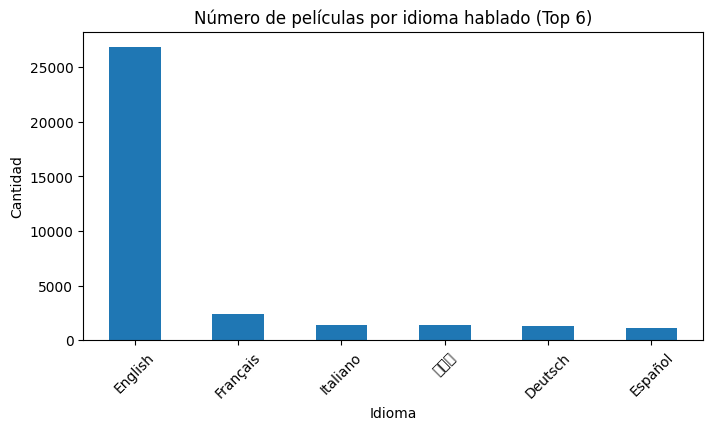

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

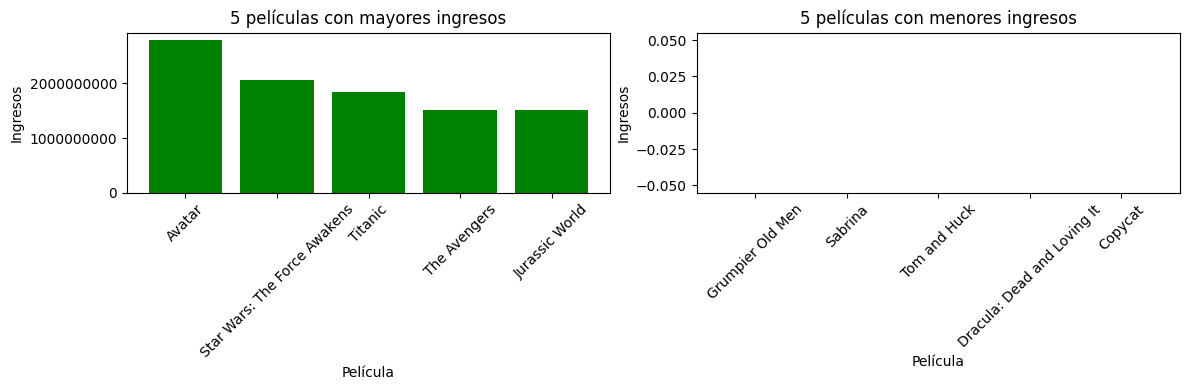

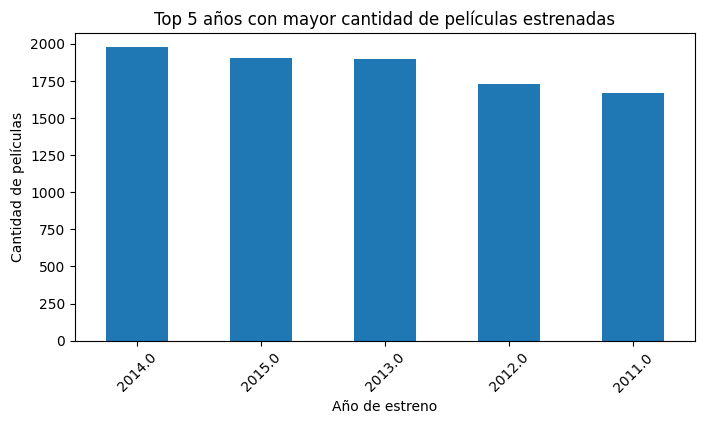

In [1]:
#Análisis Exploratorio de Datos: Descubriendo patrones, relaciones y tendencias en un conjunto de datos de películas

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv(r'C:\Users\Equipo\Downloads\Csv_Proyecto_Terminado.csv')

# Exploración inicial
print("Número de filas y columnas:", df.shape)
print("Tipos de datos de cada columna:\n", df.dtypes)

# Visualización univariada - Gráfico de barras de idiomas hablados
language_counts = df['spoken_languages'].value_counts().nlargest(6)
plt.figure(figsize=(8, 4))
language_counts.plot(kind='bar')
plt.title('Número de películas por idioma hablado (Top 6)')
plt.xlabel('Idioma')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Visualización univariada - Histograma de ingresos
revenue_top = df.nlargest(5, 'return')
revenue_bottom = df.nsmallest(5, 'return')

plt.figure(figsize=(12, 4))

# Visualización univariada - Histograma de ingresos
revenue_top = df.nlargest(5, 'revenue')
revenue_bottom = df.nsmallest(5, 'revenue')

plt.figure(figsize=(12, 4))

# Visualización univariada - Histograma de ingresos
revenue_top = df.nlargest(5, 'revenue')
revenue_bottom = df.nsmallest(5, 'revenue')

plt.figure(figsize=(12, 4))

# Gráfico de barras de las 5 películas con mayores ingresos
plt.subplot(1, 2, 1)
plt.bar(revenue_top['title'], revenue_top['revenue'], color='green')
plt.title('5 películas con mayores ingresos')
plt.xlabel('Película')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # Mostrar los números sin notación científica

# Gráfico de barras de las 5 películas con menores ingresos
plt.subplot(1, 2, 2)
plt.bar(revenue_bottom['title'], revenue_bottom['revenue'], color='red')
plt.title('5 películas con menores ingresos')
plt.xlabel('Película')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)  # Mostrar los números sin notación científica

plt.tight_layout()
plt.show()

# Visualización univariada - Gráfico de barras de años de estreno
year_counts = df['anio'].value_counts().nlargest(5)
plt.figure(figsize=(8, 4))
year_counts.plot(kind='bar')
plt.title('Top 5 años con mayor cantidad de películas estrenadas')
plt.xlabel('Año de estreno')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()